# Python実践データ分析 100本ノック  
## 第6章

### ノック51

In [1]:
import pandas as pd
factories = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/tbl_factory.csv", index_col=0)
factories.head()

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,東京工場,28,関東
FC00002,木更津工場,29,関東
FC00003,多摩工場,31,関東
FC00004,横須賀工場,25,関東
FC00005,仙台工場,21,東北


In [2]:
warehouses = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/tbl_warehouse.csv", index_col=0)
warehouses.head()

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,杉並倉庫,35,関東
WH00002,品川倉庫,41,関東
WH00003,豊洲倉庫,42,関東
WH00004,郡山倉庫,60,東北
WH00005,仙台倉庫,72,東北


In [3]:
cost = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/rel_cost.csv", index_col=0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [4]:
trans = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/tbl_transaction.csv", index_col=0)
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [5]:
join_data = pd.merge(trans, cost, left_on=["ToFC", "FromWH"], right_on=["FCID", "WHID"], how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [6]:
join_data = pd.merge(join_data, factories, on="FCID", how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東


In [7]:
join_data = pd.merge(join_data, warehouses, on="WHID", how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北,山形倉庫,65,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北,郡山倉庫,60,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東,品川倉庫,41,関東


In [8]:
join_data = join_data[["TransactionDate", "Quantity", "Cost", "ToFC", "FCName", "FCDemand", "FromWH", "WHName", "WHSupply", "WHRegion"]]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東


In [15]:
kanto = join_data.loc[join_data["WHRegion"]=="関東"]
kanto.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
7,2019-01-01 09:09:30,12,1.5,FC00001,東京工場,28,WH00003,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,27,1.5,FC00003,多摩工場,31,WH00003,豊洲倉庫,42,関東


In [16]:
tohoku = join_data.loc[join_data["WHRegion"]=="東北"]
tohoku.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北


### ノック52

In [18]:
print("関東支社の総コスト："+ str(kanto["Cost"].sum())+"万円")
print("東北支社の総コスト："+ str(tohoku["Cost"].sum())+"万円")

関東支社の総コスト：2189.3万円
東北支社の総コスト：2062.0万円


In [19]:
print("関東支社の総部品輸送個数："+ str(kanto["Quantity"].sum())+"個")
print("東北支社の総部品輸送個数："+ str(tohoku["Quantity"].sum())+"個")

関東支社の総部品輸送個数：49146個
東北支社の総部品輸送個数：50214個


In [25]:
print("関東支社の部品1つあたりの輸送コスト："+ str(int(kanto["Cost"].sum()*10000/kanto["Quantity"].sum()))+"円")
print("東北支社の部品1つあたりの輸送コスト："+ str(int(tohoku["Cost"].sum()*10000/kanto["Quantity"].sum()))+"円")

関東支社の部品1つあたりの輸送コスト：445円
東北支社の部品1つあたりの輸送コスト：419円


In [27]:
cost_chk = pd.merge(factories, cost, on="FCID", how="left")
cost_chk.head()

,FCID,FCName,FCDemand,FCRegion,WHID,Cost
0,FC00001,東京工場,28,関東,WH00001,0.4
1,FC00001,東京工場,28,関東,WH00002,0.8
2,FC00001,東京工場,28,関東,WH00003,1.5
3,FC00002,木更津工場,29,関東,WH00001,0.9
4,FC00002,木更津工場,29,関東,WH00002,0.8


In [29]:
print("関東支社の平均輸送コスト："+ str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="関東"].mean())+"万円")
print("東北支社の平均輸送コスト："+ str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="東北"].mean())+"万円")

関東支社の平均輸送コスト：1.075万円
東北支社の平均輸送コスト：1.05万円


### ノック53

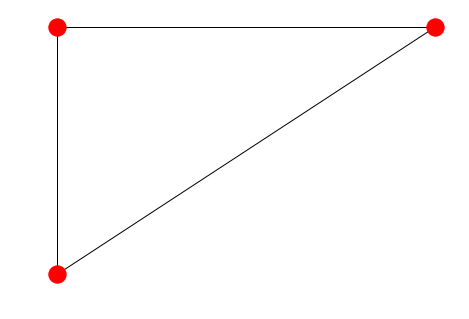

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")

pos = {}
pos["nodeA"] = (0,0)
pos["nodeB"] = (1,1)
pos["nodeC"] = (0,1)

nx.draw(G, pos)
plt.show()

### ノック54

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


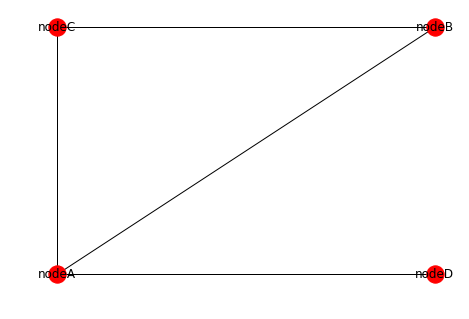

In [34]:
G.add_node("nodeD")
G.add_edge("nodeA", "nodeD")
pos["nodeD"] = (1,0)
nx.draw(G, pos, with_labels=True)

### ノック55

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

df_w = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/network_weight.csv")
df_p = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/network_pos.csv")

In [36]:
df_w.head()

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [37]:
df_p.head()

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


In [71]:
size = 10
edge_weights = []
for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_weights.append(df_w.iloc[i][j]*size)
edge_weights

[6.39921,
 1.4335300000000002,
 9.44669,
 5.21848,
 0.0,
 2.64556,
 0.0,
 4.5615,
 5.68434,
 0.0,
 6.17635,
 6.12096,
 6.16934,
 9.437479999999999,
 0.0,
 0.0,
 0.0,
 6.97631,
 0.60225,
 6.66767,
 6.706379999999999,
 2.10383,
 0.0,
 3.1542800000000004,
 0.0]

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


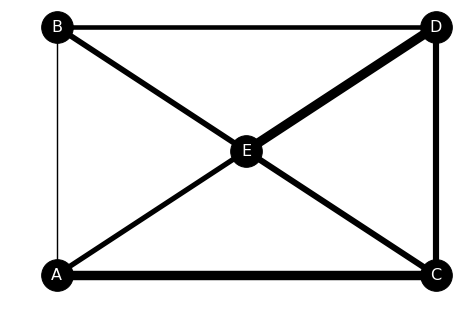

In [45]:
G = nx.Graph()

for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])

for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i], df_w.columns[j])

pos = {}
for i in range(len(df_p.columns)):
    node = df_p.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1])

nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color="k", font_color="w", width=edge_weights)
plt.show()

In [48]:
len(df_w)

5

### ノック56

In [49]:
df_tr = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/trans_route.csv", index_col="工場")
df_tr.head()

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


### ノック57

In [50]:
df_pos = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/trans_route_pos.csv")
df_pos.head()

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


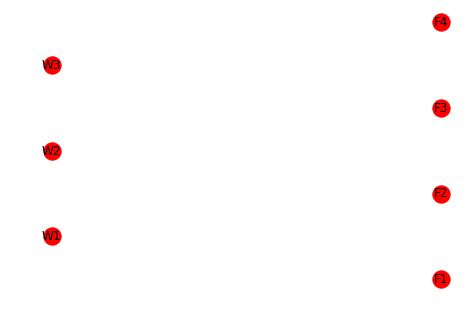

In [68]:
G = nx.Graph()

for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])

nx.draw(G, pos, with_labels=True)
plt.show()

In [74]:
size = 0.1
edge_weights = []
for i in range(len(df_tr)):
    for j in range(len(df_tr.columns)):
        edge_weights.append(df_tr.iloc[i][j]*size)
edge_weights

[1.5, 1.5, 0.0, 0.5, 0.5, 0.0, 3.0, 0.5, 1.0, 1.5, 0.2, 1.5]

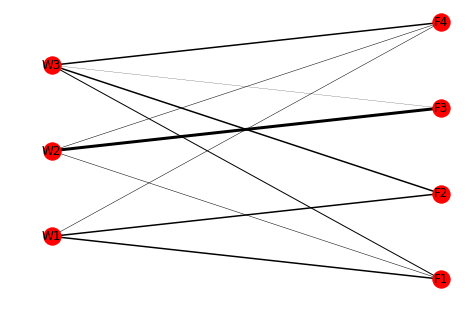

In [75]:
for i in range(len(df_tr.index)):
    for j in range(len(df_tr.columns)):
        G.add_edge(df_tr.index[i], df_tr.columns[j])
nx.draw(G, pos, with_labels=True, width=edge_weights)
plt.show()

### ノック58

In [76]:
df_tr = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/trans_route.csv", index_col="工場")
df_tc = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/trans_cost.csv", index_col="工場")

In [77]:
df_tr.head()

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [78]:
df_tc.head()

,F1,F2,F3,F4
工場,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


In [84]:
def trans_cost(df_tr, df_tc):
    cost = 0
    for i in range(len(df_tr.index)):
        for j in range(len(df_tr.columns)):
            cost += df_tr.iloc[i][j] * df_tc.iloc[i][j]
    return cost
print("総輸送コスト：" + str(trans_cost(df_tr, df_tc)))

総輸送コスト：1493


### ノック59

In [85]:
df_demand = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/demand.csv")
df_supply = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/supply.csv")

In [86]:
df_tr.head()

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [87]:
df_demand

,F1,F2,F3,F4
0,28,29,31,25


In [88]:
df_supply

,W1,W2,W3
0,35,41,42


In [107]:
for i in range(len(df_tr.index)):
    w_trans = 0
    for j in range(len(df_tr.columns)):
        w_trans += df_tr.iloc[i][j]
    print(str(df_tr.index[i]) + "からの輸送量：" + str(w_trans) + "(限界供給量:" + str(df_supply.iloc[0][i]) + ")")
    if w_trans <= df_supply.iloc[0][i]:
        print("供給限界の範囲内です。")
    else:
        print("【WARNING!】供給限界を超えています。")

W1からの輸送量：35(限界供給量:35)
供給限界の範囲内です。
W2からの輸送量：40(限界供給量:41)
供給限界の範囲内です。
W3からの輸送量：42(限界供給量:42)
供給限界の範囲内です。


In [113]:
for i in range(len(df_tr.columns)):
    f_trans = 0
    for j in range(len(df_tr.index)):
        f_trans += df_tr.iloc[j][i]
    print(str(df_tr.columns[i]) + "への輸送量：" + str(f_trans) + "(需要量:" + str(df_demand.iloc[0][i]) + ")")
    if f_trans >= df_demand.iloc[0][i]:
        print("需要量を満たしています。")
    else:
        print("【WARNING!】需要量を超えています。")

F1への輸送量：30(需要量:28)
需要量を満たしています。
F2への輸送量：30(需要量:29)
需要量を満たしています。
F3への輸送量：32(需要量:31)
需要量を満たしています。
F4への輸送量：25(需要量:25)
需要量を満たしています。


### ノック60

In [114]:
df_tr_new = pd.read_csv("../sample_100knocks/サンプルコード_20200325/6章/trans_route_new.csv", index_col="工場")

In [115]:
df_tr

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [117]:
df_tr_new

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,0
W2,5,0,30,10
W3,10,15,2,15


In [119]:
print("総輸送コスト(変更前)：" + str(trans_cost(df_tr, df_tc)))
print("総輸送コスト(変更後)：" + str(trans_cost(df_tr_new, df_tc)))

総輸送コスト(変更前)：1493
総輸送コスト(変更後)：1428


In [130]:
def condition_demand(df_tr, df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if temp_sum >= df_demand.iloc[0][i]:
            flag[i] = 1
    return flag

def condition_supply(df_tr, df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if temp_sum <= df_supply.iloc[0][i]:
            flag[i] = 1
    return flag    

In [131]:
print("需要条件 確認結果：" + str(condition_demand(df_tr_new, df_demand)))
print("供給条件 確認結果：" + str(condition_supply(df_tr_new, df_supply)))

需要条件 確認結果：[1. 1. 1. 1.]
供給条件 確認結果：[1. 0. 1.]
